<b> T5 Data Science Bootcamp</b>

# Arabic dialects

###### by: Batoul Alosaimi, Shroaq Almutiri, and Norah Alqahtani

<img src="imag/twitter-FA.png"  width=800 height=800/>

### Introduction: 
Based on our belief in the importance of the Arabic language, we have worked on a project that serves the Arabic language and its dialects by making use of artificial intelligence and machine learning, Our Arabian countries consist of a lot of dialects and in order to classify texts into its original dialects we have created "Lahjatna" project that aims to Identify dialect of speech from Twitter tweets.

### Objective:
The objective of Lahjatna project is to help organizations and institutions recognize and identify their customers types and get to know them more in order to improve their services.


## Table of Contents:


<li><a id='Libraries'> Libraries</a></li>
<li><a id='1. load data'> 1. load data</a></li>
<li><a id=' 2. Preprocessing  '>2. Preprocessing  </a></li>
<li><a id='3. Vectorization'>3.Vectorization  </a></li>
<li><a id='4. Topic modeling'>4. Topic modeling  </a></li>
<li><a id='5. Lable Tweet'>5. Lable Tweet </a></li>
<li><a id='6.Exploratory Data Analysis'>6. Exploratory Data Analysis </a></li>
<li><a id='7. Prepare data for modeling'>7. Prepare data for modeling</a></li>
<li><a id='8. Classification'>8. Classification</a></li>



## Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import os
import codecs
from wordcloud import WordCloud
import arabic_reshaper
from bidi.algorithm import get_display
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, accuracy_score, recall_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import f1_score


### 1. load data

In [2]:
df=pd.read_csv("Data/Dialect_data.csv",index_col=0)

In [3]:
df.head(5)

,tweet,label
11457,@Otty1986 بتتشرطو وتدو نصايح كإنكم دول متقدمة ...,EG
5279,@doukha_azzedine الف مبرووووووك علينا ربي يحفظ...,NaN
13104,@DerpinaJO طالع اعيش فيها يا دانا و راح اكون ب...,NaN
25609,مبارح كنت بسوق تقريبا ل 5 ساعات ومعي صحابي \nا...,PL
25831,لآ أتحمل مسؤولية أي حمار بيغلط وبيوقع بلساني :...,PL


###### 1.1 Dataframe's Information

In [4]:
df.shape

(411887, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 411887 entries, 11457 to 26790
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   tweet   411887 non-null  object
 1   label   62368 non-null   object
dtypes: object(2)
memory usage: 9.4+ MB


###### 1.2 Drop null

In [7]:
data=df.dropna()
data

,tweet,label
11457,@Otty1986 بتتشرطو وتدو نصايح كإنكم دول متقدمة ...,EG
25609,مبارح كنت بسوق تقريبا ل 5 ساعات ومعي صحابي \nا...,PL
25831,لآ أتحمل مسؤولية أي حمار بيغلط وبيوقع بلساني :...,PL
5172,الصبح من دونك قفل بيبانه\nاصحي وخلي يكتسينا ضي...,OM
8271,@maya_e2 والله تمام كل الامور تحت السيطرة\nمرض...,SY
...,...,...
30170,البنات ياربي 😱 بصااااير مش بنات 😒...,LY
8093,@1knz1 بدك بروكسي بدك تعمل جيليبريك لانو البرا...,SY
33770,عاد عيد الشوق واشواقي تگلم\nعن غلاگ وگيف احبگ ...,KW
20939,ليه الناس اللى كل ما نحاول نقرب منهم بيحاولوا ...,EG


In [8]:
data.isna().sum()

tweet    0
label    0
dtype: int64

In [11]:
#data.drop(['label'],axis='columns', inplace=True)


## 2. Preprocessing

##### 2.1 stop word list

In [12]:
mystop = ['مثلا', 'الحمدلله', 'السنه', 'صوت', 'بو', 'تشوف',
 'موضوع', 'فتره', 'بعيد', 'الصوره', 'ابدا', 'الحب', 'الحمد', 'معاهم', 'قلبك', 'وانتي', 'لحد', 'واحنا', 'عمرك', 'دوله',
 'الحياه', 'امين', 'ابن', 'اخوي', 'مني', 'اسمه', 'ياخي', 'باقي', 'انتوا', 'حب', 'عندكم', 'شغل', 'كلامك', 'يسعد', 'تبي',
 'مبروك', 'طلعت', 'شلون', 'تعرف', 'كثر', 'بلا', 'وبعدين', 'عام', 'عيب', 'مليون', 'رمضان', 'لاعب', 'البيت', 'نص', 'جديد',
 'ثاني', 'عارفه', 'فلوس', 'الصبح', 'الاول', 'شيء', 'صوره', 'فقط', 'وفي', 'جاي', 'جماعه', 'بن', 'خلص', 'وان', 'شعب',
 'واضح', 'تحت', 'طب', 'يلا', 'واذا', 'صارت', 'عنه', 'ضد', 'ماشي', 'لسه', 'يبي', 'بخير', 'روح',
 'حبيبي', 'سنين', 'كثير', 'دول', 'زين', 'شوف', 'دايما', 'بكره', 'يجي', 'كلنا', 'الوقت', 'يبارك', 'اهم', 'معاه', 'مشكله',
 'السعوديه', 'الكويت', 'اشوف', 'فكره', 'لين', 'انهم', 'مكان', 'حرام', 'لله', 'يطلع', 'اعرف', 'افضل', 'صحيح', 'فوق', 'ترى',
 'اه', 'بعدين', 'المفروض', 'كبير','شكرا', 'تاني','ايه','احنا','وين','ليش','شو','الا', 'شفت', 'غلط', 'للاسف', 'تويتر',
 'نفسك', 'ساعه', 'معك', 'البلد', 'بنت', 'محد','اهل', 'معاك', 'نفسه', 'اشي', 'ايش', 'المهم', 'بقى', 'انتو', 'مافي', 'منو',
 'عاد', 'كلمه', 'اكبر', 'كلهم', 'والا', 'نفسي', 'المشكله', 'اقول', 'ايام', 'قاعد', 'يلي', 'زمان', 'الكل', 'انها', 'محمد',
 'ام', 'طلع', 'بكل', 'شويه', 'تقول', 'عليكم', 'الواحد', 'صباح', 'قلت', 'خلاص', 'يصير', 'الموضوع', 'عندهم', 'العالم',
 'الدنيا', 'الشعب', 'طبعا', 'طول', 'رب', 'الخير', 'اما', 'حلو', 'فعلا', 'مب', 'شوي', 'احد', 'وكل', 'وقت', 'فيهم', 'منك',
 'شخص', 'قلبي', 'الكلام', 'عارف', 'منهم', 'اخر', 'كلها', 'هاي', 'حلوه', 'اكتر', 'يمكن', 'تكون', 'لانه', 'واللي', 'كلام',
 'الحين', 'احلى', 'علشان', 'عندنا', 'بالله', 'الف', 'عندك', 'احسن', 'قطر', 'وحده', 'علينا', 'بدون', 'عنده', 'يقول', 'عادي',
 'كله', 'عليها', 'دا', 'حق', 'ابو', 'عليهم', 'اصلا', 'فيك', 'مصر', 'اكيد', 'اللى', 'كتير', 'رح', 'ربنا', 'كمان',
 'ليه', 'لان', 'اكثر', 'ال', 'وانت', 'انتي', 'طيب','سنه', 'كده', 'نفس', 'عندي', 'هيك','خير','صح','مين','شاء','مثل',
 'انو','زي','صار','انك','عم','ربي','يارب','حاجه','كنت','اليوم','اني','اول','ممكن','مره','دي','وانا','ناس','راح','حد',
 'لازم','يوم','ده','مو','علي','واحد','اي','الناس','يعني','عشان','اذا','انت','شي','هه','والله','مش','انا','الله','اللي',
 'الجديد', 'عالم', 'طريقه', 'تونس', 'كفايه', 'ارجع', 'التغريده', 'الاخر', 'السبب', 'حسن', 'صعبه', 'راسك', 'تحكي', 'عبد', 'لمن', 'عني',
 'والناس', 'عيونك', 'للناس', 'الصراحه', 'داخل', 'الامارات', 'رقم', 'العام', 'امريكا', 'حصل', 'خايف', 'لبنان', 'يتكلم', 'فرق', 'غريب',
 'العربيه', 'ماشاء', 'رغم', 'علاقه', 'يرحمه', 'الهلال', 'خلك', 'فيديو', 'مبارك', 'موجوده', 'ساعات', 'انته', 'لينا', 'المباراه', 'مافيه', 'ماراح',
 'شعور', 'ترجع', 'للحين', 'باي', 'شايف', 'باب', 'تميم', 'مدري', 'جاب', 'ولما', 'صاحب', 'يسلمك', 'صرت', 'الوطن', 'تانيه', 'الجيش',
 'يرجع', 'يحفظك', 'يعمل', 'لقيت', 'يرحم', 'صدق', 'الموسم', 'خالد', 'اهو', 'الفلوس', 'اغلب', 'وكان', 'اسبوع', 'اخي', 'قصه', 'الاقل',
 'هالشي', 'اغنيه', 'يستر', 'يابو', 'سنوات', 'عين', 'اسمع', 'يومين', 'بالضبط', 'مرات', 'كاس', 'كانو', 'خاصه', 'رجل', 'تستاهل', 'بعدها',
 'قادر', 'يخليك', 'امه', 'وربي', 'صور', 'نعرف', 'راه', 'اقسم', 'طيبه', 'الوحيد', 'بتكون', 'السيسي', 'عيال', 'الدوري', 'لاني', 'ياخذ',
 'بسرعه', 'رايح', 'امك', 'تقدر', 'تو', 'جديده', 'مساء', 'برضو', 'راسي', 'كفو', 'جمهور', 'مجرد', 'قاعده', 'مهم', 'ريال', 'غالي', 'اعمل',
 'الشيخ', 'شاءالله', 'برا', 'صلاح', 'الحلوه', 'صباحك', 'الدين', 'اروح', 'بكون', 'عيد', 'بلاش', 'عرفت', 'معانا', 'اسمها', 'النوم', 'يلعب',
 'شر', 'راس', 'خبر', 'ادري', 'الرجال', 'غيره', 'عايشين', 'وهم', 'واحده', 'شباب', 'فاهم', 'حالك', 'دور', 'اتمنى', 'حالي', 'الفيديو', 'بشكل',
 'بالعكس', 'حسب', 'كامل', 'وجه', 'كويس', 'يستاهل', 'ليبيا', 'الشارع', 'جو', 'قوي', 'الطيب', 'نقول', 'غيرك', 'ابي', 'عنها', 'قريب', 'بكرا',
 'تسلم', 'قالت', 'تعال', 'عارفين', 'تروح', 'راحت', 'فيني', 'حل', 'اقل', 'منكم', 'تجي', 'دام', 'بحب', 'بيكون', 'الليل', 'مباراه', 'الثاني',
 'الوكيل', 'عايش', 'روحي', 'الارض', 'بلد', 'بسبب', 'ايران', 'معه', 'حاليا', 'فيكم', 'تقريبا', 'الاهلي', 'الشخص', 'العين', 'دخل', 'يشوف',
 'فريق', 'ياريت', 'سبب', 'شكلك', 'العرب', 'مال', 'الفريق', 'ودي', 'يقدر', 'ماهو', 'بدل', 'يروح', 'بنات', 'بالي', 'قول', 'الجو', 'نبي', 'عمر',
 'رئيس', 'اختي', 'اكل', 'دكتور', 'تصير', 'رد', 'احس', 'العمر', 'امس', 'حال', 'ورا', 'وعلى', 'بقي', 'اجمل', 'عيني', 'صعب', 'شن', 'وهي',
 'وبس', 'كانوا', 'الدوله', 'صراحه', 'باذن', 'يبقى', 'كبيره', 'اعتقد', 'الشي', 'للي', 'اسم', 'صاير', 'ثانيه', 'نشوف', 'بالنسبه', 'سؤال', 'الحق',
 'كنا', 'لكل', 'ماله', 'يقولون', 'انسان', 'بالك', 'جميل', 'مستحيل', 'الساعه', 'حياتي', 'احب', 'اساس', 'الان', 'الوضع', 'عمل', 'ولد', 'البنات',
 'بصراحه', 'عنك', 'رجال', 'فين', 'يالله', 'الشباب', 'الايام', 'بلوك', 'تطلع', 'اتوقع', 'طبيعي', 'امي', 'قدام', 'ونعم', 'الحكومه', 'بيت', 'خل',
 'حساب', 'القلب', 'شهر', 'بعرف', 'احمد', 'حبيبتي', 'انتم', 'جد', 'حاله', 'البنت', 'حتي', 'عمره', 'موجود', 'فينا', 'اللهم', 'حسبي', 'يعرف',
 'بجد', 'عمري', 'العيد', 'عليا', 'معي', 'شكله', 'قلب',
 'شوفي','شفته','وانتم','يوصل','خصوصا','وبين','لعبه','المسلسل','نوع','الحلقه','وحتى','اى','اش',
 'عايشه','سعد','انشالله','كره','المكان','شهور','هديه','حلقه',
 'اكتب','فاهمه','صغيره','كون','قالو','الملعب','هدف','البحر','كوره','الاولى',
 'معروف','اقوى','تجيب','يضحك','خاطر','الصحه','واقف','مجلس','لحظه',
 'حبيب','السالفه','الشوق','دخلت','الرئيس','ومع','العربي','مصر',
 'روحك','بيهم', 'بتقول','يدخل','مسكين','فيلم','الثانيه','معناها',
 'عمان','العراق','ياارب','افهم','الفكره','تغريده','بال',
 'دقايق','اننا','الروح','حمار','شاف','الدول','يعطيك',
 'تركيا','معاكم','تدخل','الورد','نور','طويل','تركي',
 'شغله','جميع','خساره','وقتها','الكلب','بالخير','الغلط',
 'الاتحاد','قيمه','جمال','اجل','نادي','برشلونه','تمام','قليل',
 'ضروري','الطريق','معنا','المصري','قالك','تغير',
 'السؤال','بعده','ميسي','بيقول','حكم','سلام','تعمل',
 'عز','اولا','ترامب','ليله','بره','تسوي','الفرق','دايم',
 'احبك','بالف','السياره','ماكو','مدريد','تمشي','النادي',
 'الجاي','ثوره','احساس','يرد','وخلاص','مشاكل','ينزل','الباب','لانهم',
 'قويه','الحكم','حمد','نعمه','معاها','هاذي','جنب','عبدالله','قصدي',
 'الاكل','ثلاث','الانسان','قهوه','تدري','ايوه','وبعدها','مفروض','الجمهور','القصه',
 'المنتخب','وجهه','الجامعه','غصب','الحلو','امل','الفيس','جايه',
 'يمشي','بدري','الحل','خاص','جيت','سوريا','لسانك','كلامي',
 'رحت','نزل','يسعدك','ونص','الخليج','علم','المره','الك',
 'نفسهم','السلام','اشياء','الحال','حط','بصير','توصل',
 'شيخ', 'برنامج','يعنى','الاخوان','مثلك','بدايه','العظيم','قالوا','الغالي',
 'قوه','عيوني','حياتك','شخصيه','عمي','وسط','والي','طال',
 'لانها','اجازه','المغرب','عامل','سعيد','الصح','دقيقه','استاذ',
 'يلعن','غريبه', 'عربي','شئ','دليل','انكم','بينا',
 'شكل','حرب','معلش','مبرووك','تحس','يقولك','الريال','يحب',
 'وزير','مدرب','العافيه','الحقيقه','مالها','نسيت','عدل',
 'دم','سمعت','خالص','وجهك','بنفس','اطلع','معقول','فرصه',
 'خليك','مات','ولاد','البشر','مسلسل','الجنه','طريق','دائما',
 'اكون','ويا','يوفقك','حي','حياه','البحرين','المصريين',
 'عنهم','رايك','معاي','صغير','تتكلم','هوا','سلمان','نفسها',
 'الكوره','ديما','كميه','قدر','حبيت','فايده','معهم','بطل',
 'زى','النصر','يسوي','سالفه','يجيب','الشغل','زايد','محتاج',
 'فاضي','كلب','كريم','بدها','زياده','ليها','مادري','اقدر',
 'طالع','قناه','حر','وصلت','انام','عليكي','لعب','جميله'
,'الامور','الخبر','ازاي','بقول','لانك','عقب','سبحان','وصل',
 'إذ', 'إذا', 'إذما', 'إذن', 'أف', 'أقل', 'أكثر', 'ألا',
'إلا', 'التي', 'الذي', 'الذين', 'اللاتي', 'اللائي',
 'اللتان', 'اللتيا', 'اللتين', 'اللذان', 'اللذين', 'اللواتي', 'إلى', 'إليك', 'إليكم', 'إليكما', 'إليكن', 
  'أم', 'أما', 'أما', 'إما', 'أن', 
  'إن', 'إنا', 'أنا', 'أنت', 'أنتم', 'أنتما', 'أنتن', 'إنما', 'إنه', 'أنى', 'أنى', 'آه', 'آها',
 'أو', 'أولاء', 'أولئك', 'أوه', 'آي', 'أي', 'أيها', 'إي', 'أين', 'أين', 'أينما'
, 'إيه', 'بخ', 'بس', 'بعد', 'بعض', 'بك', 'بكم', 'بكم', 'بكما'
, 'بكن', 'بل', 'بلى', 'بما', 'بماذا', 'بمن', 'بنا', 'به',
'بها', 'بهم', 'بهما', 'بهن', 'بي', 'بين','و', 'بيد',
'تلك', 'تلكم', 'تلكما', 'ته', 'تي', 'تين', 'تينك',
'ثم', 'ثمة', 'حاشا', 'حبذا', 'حتى', 'حيث', 'حيثما',
'حين', 'خلا', 'دون', 'ذا', 'ذات', 'ذاك', 'ذان', 'ذانك', 'ذلك',
'ذلكم', 'ذلكما', 'ذلكن', 'ذه', 'ذو', 'ذوا', 'ذواتا',
'ذواتي', 'ذي', 'ذين', 'ذينك', 'ريث', 'سوف', 'سوى', 'شتان', 'عدا',
'عسى', 'عل', 'على', 'عليك', 'عليه', 'عما', 'عن', 'عند', 'غير',
'فإذا', 'فإن', 'فلا', 'فمن', 'في', 'فيم', 'فيما', 'فيه', 'فيها',
'قد', 'كأن', 'كأنما', 'كأي', 'كأين', 'كذا', 'كذلك', 'كل', 'كلا',
'كلاهما', 'كلتا', 'كلما', 'كليكما', 'كليهما', 'كم', 'كم', 'كما',
'كي', 'كيت', 'كيف', 'كيفما', 'لا', 'لاسيما', 'لدى', 'لست', 'لستم',
'لستما', 'لستن', 'لسن', 'لسنا', 'لعل', 'لك', 'لكم', 'لكما',
'لكن', 'لكنما', 'لكي', 'لكيلا', 'لم', 'لما', 'لن', 'لنا',
'له', 'لها', 'لهم', 'لهما', 'لهن', 'لو', 'لولا', 'لوما',
'لي', 'لئن', 'ليت', 'ليس', 'ليسا', 'ليست', 'ليستا', 'ليسوا', 'ما',
 'ماذا', 'متى', 'مذ', 'مع', 'مما', 'ممن', 'من', 'منه', 'منها', 'منذ',
'مه', 'مهما', 'نحن', 'نحو', 'نعم', 'ها', 'هاتان', 'هاته', 'هاتي',
'هاتين', 'هاك', 'هاهنا', 'هذا', 'هذان', 'هذه', 'هذي', 'هذين', 'هكذا',
'هل', 'هلا', 'هم', 'هما', 'هن', 'هنا', 'هناك', 'هنالك', 'هو', 'هؤلاء',
'هي', 'هيا', 'هيت', 'هيهات', 'والذي', 'والذين', 'وإذ', 'وإذا', 'وإن',
'ولا', 'ولكن', 'ولو', 'وما', 'ومن', 'وهو', 'يا'
, 'من' , 'على', 'الى','هما', 'مع', 'هذه', 'التي', 'كما ', 'ذلك ', 'لذا', 'عن', 'في','ان','كان','كانت','الى','قبل','أنه','تم'
 ,'وقال','قال','فى','وقد','قد','ولم',
'وذلك','ذلك','يكون','او'
,'وهذه','وهي ','وبعد','وهذا','عندها','جدا','بأن','انه','الي','للاسف','عشان','طيب','علشان','بدون','اكيد','عشان','تويتر','انت','وين','والله','الناس','مين',
'شخص','يعني','ليش','اكيد','ايه','كلام','يقول','تقول','عادي','عندك','قلبي','انتي','ناس','وانت',
'اني','انا' ,'وانا','يارب','الله','كنت','الان','هاي','العفاريت', 'فلسطيني', 'حلب', 'حمص']


In [13]:
stop_set = set(mystop) # To make the word it unique

In [14]:
stop_ls = list(stop_set) # convert from set to list

In [15]:
def clean_text(text):
    # remove all tashkeel
    
    text = re.sub("[ًٌٍَُِّّْْٰۡۨـٖۗۗۖ]", "", text)
    #remove URLs
    text = re.sub(r"http\S+", "", text,flags=re.U)    

    # Remove user @ references and '#' from tweet
    text = re.sub(r'\@\w+|\#\w+','', text)
    text = re.sub("\n", " ", text)
    text = re.sub("[^ضصثقفغعهخحجدطكمنتالبيسشئءؤرلاىةوزظٱإأآذ]", " ", text)
    text = re.sub("سكس", " ", re.sub("نيك", " ", re.sub("قحبه", " ", re.sub("فحل", " ", re.sub("ديوث", " ", text)))))
    text = re.sub(' +', ' ', text)  # removing unnecessary spaces

    return text.strip()
    

In [16]:
def remove_repeated_letters(text):
    
    text = re.sub(r'(.)\1+', r'\1\1', text)  
   # text = re.sub(r'(.)\1+', r'\1', text) 

    return text

In [17]:
def correct(text):

    text = re.sub(" ف ", " في ", text)
    text = re.sub(" ع ", " على ", text)

    return text

In [18]:
def simplify(text):

    text = re.sub("[أإٱآ]", "ا", text)
    text = re.sub("ة", "ه", text)

    return text


In [19]:
def remove_stopwords(text):
     #Read a csv file containing 750 stopwords 
    stopwords = pd.read_csv("Data/Arabic-Stopword.csv")
    stop=stopwords['text'].tolist()
    text_list = text.split(' ')  # to remove stopwords easily  
    new_text_list = []
   
    for s in text_list:
        if not (s in stop) and not(s in stop_ls): #Checks two lists
            new_text_list.append(s)
        
    text = ' '.join(e for e in new_text_list)  # gather text together again

    return text
    

In [20]:
def preprocess_text(text):
    # clean text
    text = clean_text(text)
  
    # remove repeated letters
    text = remove_repeated_letters(text)

    # correct misspelling
    text = correct(text)
   
    # simplify
    text = simplify(text)
  
    # remove stopwords
    text = remove_stopwords(text)

    return text

In [21]:
data["tweet"] = data["tweet"].apply(preprocess_text)

<ipython-input-21-9a8b8d64a8fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"] = data["tweet"].apply(preprocess_text)


###### Saved pre processed data in a csv file to avoid technical problems 

In [22]:
data.to_csv("Data/Dialect_clean.csv")

###### read the data from csc file instead of running all cells above

In [23]:
data = pd.read_csv("Data/Dialect_clean.csv",index_col=0)


In [24]:
data

,tweet
11457,بتتشرطو وتدو نصايح كانكم متقدمه وناجحين اومال ...
25609,مبارح بسوق ومعي صحابي فجاه شب بتطلع فيا وبقلي ...
25831,اتحمل مسؤوليه بيغلط وبيوقع بلساني
5172,قفل بيبانه اصحي وخلي يكتسينا ضيه الكسلانه ويسع...
8271,السيطره مرضنا عتغير مرضه بسيطه كيفك اخبارك
...,...
30170,ياربي بصااير
8093,بدك بروكسي بدك جيليبريك لانو البرامج تبع البرو...
33770,واشواقي غلا يف واهتويت اتحلم تهنى ريت
20939,نحاول نقرب بيحاولوا باى يبعدوا المسفات نهايتها...


#### WordCloud after clean

In [26]:
#### Needs install
#pip install python-bidi
#pip install arabic-reshaper
#conda install -c conda-forge wordcloud=1.6.0 

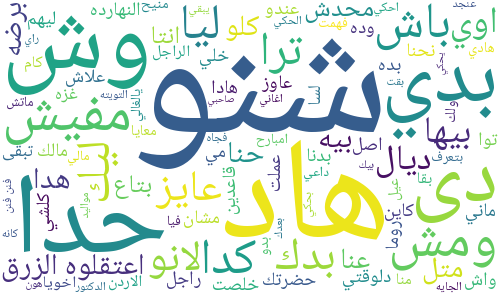

In [27]:
#1-Visualize the 100 most frequent words used in all the tweets using a Word cloud.

texts = ' '.join([txt for txt in data['tweet']])
#te=removeWeirdChars(texts);
reshaped_text = arabic_reshaper.reshape(texts)
bidi_text = get_display(reshaped_text)
wordcloud = WordCloud(max_words=100,width=500, height=300, background_color="white",font_path='Data/ArbFONTS-NotoNaskhArabic-Regular.ttf').generate(bidi_text)
wordcloud.to_file("imag/worCloud.png")
wordcloud.to_image()

## 3. Vectorization

#### 3.1 CountVectorization


In [28]:
vectorizer= CountVectorizer()
CV = vectorizer.fit_transform(data['tweet'])
CV.shape

(61530, 122715)

In [29]:
data_cv = pd.DataFrame(CV.toarray(),columns = vectorizer.get_feature_names())
data_cv

,ؤاحضنك,ؤالحمدلله,ؤالحياه,ؤاللؤلؤه,ؤالله,ؤاللي,ؤانا,ؤاناا,ؤانتهى,ؤايكم,...,ييعطيكوا,ييفرق,ييقا,ييكشف,ييل,ييلا,ييلس,ييلي,يين,ييه
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61525,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61526,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 3.2 CountVectorization Using (1, 2) Grams


In [30]:
# the numbers are not removed here
CV_grams = CountVectorizer(stop_words= stop_ls, ngram_range = (1,2))
CV_grams_ = CV_grams.fit_transform(data['tweet'])
CV_grams_.shape

(61530, 471490)

In [31]:
data_grams = pd.DataFrame(CV_grams_.toarray(),columns = CV_grams.get_feature_names())
data_grams

,ؤاحضنك,ؤاحضنك وانسى,ؤالحمدلله,ؤالحمدلله اصابه,ؤالحياه,ؤالحياه قسمه,ؤاللؤلؤه,ؤاللؤلؤه والمجمعات,ؤالله,ؤالله كسر,...,ييلا بتكشي,ييلس,ييلس بدال,ييلي,ييلي بيصيبك,يين,يين لمنير,ييه,ييه زوزو,ييه قلتلك
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61525,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61526,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 3.3 TfidfVectorizer Using (1, 2) Grams

In [32]:
CV_TF_IDF = TfidfVectorizer(stop_words= stop_ls,ngram_range = (1,2))
CV_TF_IDF_ = CV_TF_IDF.fit_transform(data['tweet'])
CV_TF_IDF_.shape

(61530, 471490)

In [33]:
df_tf = pd.DataFrame(CV_TF_IDF_.toarray(),columns = CV_TF_IDF.get_feature_names())
df_tf

,ؤاحضنك,ؤاحضنك وانسى,ؤالحمدلله,ؤالحمدلله اصابه,ؤالحياه,ؤالحياه قسمه,ؤاللؤلؤه,ؤاللؤلؤه والمجمعات,ؤالله,ؤالله كسر,...,ييلا بتكشي,ييلس,ييلس بدال,ييلي,ييلي بيصيبك,يين,يين لمنير,ييه,ييه زوزو,ييه قلتلك
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 4. Topic modeling

In [34]:
def display_dialicts(model, feature_names, no_top_words, dialict=None):
    for ix, dial in enumerate(model.components_):
        if not dialict or not dialict[ix]:
            print("\nDialect ", ix)
        else:
            print("\nDialect: '",dialict[ix],"'")
        print(", ".join([feature_names[i]
                        for i in dial.argsort()[:-no_top_words - 1:-1]]))

#### 4.1 LSA

###### 4.1.1 LSA and CountVectorization

In [35]:

lsa_ = TruncatedSVD(4)
tw_dial = lsa_.fit_transform(CV)
# the percentage of variance that is attributed by each of the selected components/topics
lsa_.explained_variance_ratio_

array([0.00204028, 0.00170768, 0.0015271 , 0.00150822])

In [36]:
display_dialicts(lsa_, vectorizer.get_feature_names(),30)


Dialect  0
فنن, ياشبااب, فن, شغلنا, الباص, فرحه, هاد, بالسلامه, ببعض, اتمسكوا, تاراتاتاتاتاا, ياصبايا, اعتقال, عقبال, منيح, حزام, بالايد, عالقلب, الايد, سلميه, مواليد, ميادين, اهلا, ورده, غياب, منوره, الزرق, طلوا, ياشباب, العفو

Dialect  1
الفجر, صلاه, كسم, وادان, ادان, ينعل, ابوكو, وش, ركعتين, شنو, ومافيها, هاد, همج, الفريضه, اختك, ليل, ومش, بدي, ترا, خيرا, اذان, ركعتا, التراويح, وجعير, وصلاه, نهار, القران, صحيت, الصلاه, بنص

Dialect  2
شنو, هاد, ليك, بيها, مواليد, الزرق, وش, ادا, اعتقلوه, هدا, عايزين, واش, زول, حدا, عايز, البلاد, بتاريخ, ليا, ومش, ديال, باش, نهار, علاش, حنا, مفيش, المدرب, كدا, ديل, كاين, بدي

Dialect  3
مواليد, الزرق, اعتقلوه, بتاريخ, حاجز, تبع, ماحدا, بيعرف, دمشق, اخدوه, سوري, بيته, الامن, قريه, محمود, ريف, طالب, ادلب, درعا, متزوج, حدا, دير, حماه, العسكري, بيشتغل, بحمص, مصطفى, الجويه, بشهر, بابا


###### 4.1.2 LSA and TfidfVectorizer

In [37]:
lsa = TruncatedSVD(n_components=4, random_state=None)
lsa.fit(CV_TF_IDF_)

TruncatedSVD(n_components=4)

In [38]:
display_dialicts(model=lsa, feature_names=CV_TF_IDF.get_feature_names(), no_top_words=50)


Dialect  0
الزرق, مواليد, اعتقلوه, اعتقلوه الزرق, بتاريخ, مواليد اعتقلوه, الزرق بتاريخ, حاجز, الزرق تبع, تبع, ماحدا, دمشق, بيعرف, ماحدا بيعرف, الزرق حاجز, سوري, بيته, تبع الامن, الامن, قريه, الزرق بيته, درعا, اخدوه, ادلب, بتاريخ حاجز, ريف, محمود, اخدوه الزرق, متزوج, الامن العسكري, دير, مواليد دمشق, حماه, العسكري, طالب, دمشق اعتقلوه, سوري سوري, بشهر, بيشتغل, بحمص, الجويه, مصطفى, وليد, مواليد سوري, بابا, حماه مواليد, بابا عمرو, التل, الشام, مواليد اخدوه

Dialect  1
شنو, هاد, ليك, دى, عايز, بيها, بدي, بيها شنو, ياغالي, شنو شنو, كدا, زول, شنو دارو, شنو هاد, ليا, جيل شنو, وش, واش, شنو الغباء, شنو ميلان, بيبي شنو, شنو يظحك, يظحك, الدليل شنو, راضيه شنو, شنو بيشوف, دارو, شنو التخلف, شنو العنصريه, الليله, شنو قصته, دافعين شنو, شنو رسول, ياخذه شنو, البيتزا شنو, شنو قولنا, شنو السمحه, شنو ينصرهم, جيل, ميلان, شنو الكياته, شنو نبكي, علاقتو, علاقتو شنو, البيتزا, حنا, الكياته, شنو محتاره, شنو رسمتي, شنو فهموني

Dialect  2
هاد, حدا, الحكي, ديال, بعمرك, بحال, توا, كلو, بدك, بدي, بحال هاد, فنن, بزااف, 

#### 4.2 NMF 

###### 4.2.1 NMF and CountVectorization

In [39]:
NMF_model = NMF(n_components=4, random_state=None)
NMF_model.fit(CV)

/Users/batoul/Applications/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


NMF(n_components=4)

In [40]:
display_dialicts(model=NMF_model, feature_names=vectorizer.get_feature_names(), no_top_words=30)


Dialect  0
فنن, ياشبااب, فن, شغلنا, الباص, فرحه, هاد, بالسلامه, ببعض, اتمسكوا, تاراتاتاتاتاا, ياصبايا, اعتقال, عقبال, منيح, حزام, بالايد, عالقلب, الايد, سلميه, ميادين, اهلا, ورده, غياب, منوره, طلوا, ياشباب, العفو, مادخله, بالسلاامه

Dialect  1
الفجر, صلاه, كسم, وادان, ادان, ينعل, ابوكو, وش, ركعتين, ومافيها, همج, الفريضه, ليل, اختك, خيرا, اذان, ركعتا, التراويح, وجعير, وصلاه, نهار, القران, صحيت, الصلاه, بدي, بنص, نمت, تقبل, عاوزين, هاد

Dialect  2
شنو, هاد, ليك, بيها, ادا, وش, هدا, عايزين, واش, باش, زول, البلاد, عايز, حدا, ليا, ديال, نهار, علاش, حنا, المدرب, ديل, كاين, الجايه, عملو, نعمل, ومش, الليله, داك, بتكلم, فانز

Dialect  3
مواليد, الزرق, اعتقلوه, بتاريخ, حاجز, تبع, ماحدا, بيعرف, دمشق, اخدوه, سوري, بيته, الامن, قريه, محمود, ريف, طالب, ادلب, درعا, متزوج, حدا, دير, العسكري, حماه, بيشتغل, بحمص, مصطفى, الجويه, بشهر, بابا


##### 4.2.2 NMF and TfidfVectorizer

In [41]:
NMF_model = NMF(n_components=4, random_state=None)
NMF_model.fit(CV_TF_IDF_)

/Users/batoul/Applications/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


NMF(n_components=4)

In [42]:
display_dialicts(model=NMF_model, feature_names=CV_TF_IDF.get_feature_names(), no_top_words=30)


Dialect  0
الزرق, مواليد, اعتقلوه, اعتقلوه الزرق, بتاريخ, مواليد اعتقلوه, الزرق بتاريخ, حاجز, الزرق تبع, تبع, ماحدا, دمشق, بيعرف, ماحدا بيعرف, الزرق حاجز, سوري, بيته, تبع الامن, الامن, قريه, الزرق بيته, درعا, اخدوه, ادلب, بتاريخ حاجز, ريف, محمود, اخدوه الزرق, متزوج, الامن العسكري

Dialect  1
شنو, ليك, بيها, بيها شنو, شنو شنو, زول, كدا, شنو دارو, جيل شنو, شنو الغباء, شنو ميلان, بيبي شنو, شنو يظحك, يظحك, الدليل شنو, راضيه شنو, شنو بيشوف, شنو التخلف, وش, شنو العنصريه, شنو هاد, دارو, شنو قصته, دافعين شنو, ياخذه شنو, شنو رسول, البيتزا شنو, شنو قولنا, شنو السمحه, شنو ينصرهم

Dialect  2
هاد, فنن, الحكي, ديال, بحال, بحال هاد, فنن فنن, بزااف, واش, كلو, باش, كاين, هاد الحكي, بدو, بدي, هاد الاسبوع, ليا, الاسبوع, بزاف, كاين هاد, رايي هاد, رايي, الزفت هاد, هاد هالسنه, اييش هاد, هاد الليله, الشهر, زعما, يوصلك, هون

Dialect  3
حدا, بدي, دى, حدا حدا, منيح, لانو, متل, حدا مبسوط, بيعرف, مبسوط, وش, نحنا, بحياتي, مشان, منيح حدا, تخلي حدا, بهيك, بعدك, ريت, بحكي, تخلي, ومش, التاريخ حدا, حدا صدقني, بدك, حدا

###### Because the results of LSA with CV TF IDF appear to be superior to those of the other, we'll use it to label the data.


## 5. Lable Tweet

In [43]:
topic_results = lsa.transform(CV_TF_IDF_)

data['topics'] = topic_results.argmax(axis=1)

<ipython-input-43-3429af72f473>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['topics'] = topic_results.argmax(axis=1)


In [44]:
data_lable = data.reset_index()

In [45]:
data_lable.head()

,index,tweet,topics
0,11457,بتتشرطو وتدو نصايح كانكم متقدمه وناجحين اومال ...,2
1,25609,مبارح بسوق ومعي صحابي فجاه شب بتطلع فيا وبقلي ...,2
2,25831,اتحمل مسؤوليه بيغلط وبيوقع بلساني,3
3,5172,قفل بيبانه اصحي وخلي يكتسينا ضيه الكسلانه ويسع...,2
4,8271,السيطره مرضنا عتغير مرضه بسيطه كيفك اخبارك,3


In [46]:
conditions = [data_lable['topics'] == 0, data_lable['topics'] == 1 ,data_lable['topics'] == 2, data_lable['topics'] == 3]


In [47]:
lable =["Nilotic","Gulf","Moroccan","Levantine"]

In [48]:
data_lable['Dialect'] = np.select(conditions, lable,default = np.nan)

In [49]:
data_lable.head()

,index,tweet,topics,Dialect
0,11457,بتتشرطو وتدو نصايح كانكم متقدمه وناجحين اومال ...,2,Moroccan
1,25609,مبارح بسوق ومعي صحابي فجاه شب بتطلع فيا وبقلي ...,2,Moroccan
2,25831,اتحمل مسؤوليه بيغلط وبيوقع بلساني,3,Levantine
3,5172,قفل بيبانه اصحي وخلي يكتسينا ضيه الكسلانه ويسع...,2,Moroccan
4,8271,السيطره مرضنا عتغير مرضه بسيطه كيفك اخبارك,3,Levantine


In [50]:
topics=pd.DataFrame(topic_results, columns=['Topic_'+str(x) for x in range(topic_results.shape[1])])

In [51]:
topics = topics.reset_index()


In [52]:
topics.head(10)


,index,Topic_0,Topic_1,Topic_2,Topic_3
0,0,0.000083,0.000412,0.000504,0.000489
1,1,0.000970,0.001470,0.002382,0.002091
2,2,0.000058,0.000059,0.000188,0.000916
3,3,0.000090,0.000139,0.000613,0.000125
4,4,-0.000094,0.000548,0.001308,0.002030
5,5,0.000137,0.001450,-0.000069,0.000166
6,6,0.000882,0.003658,0.007661,0.001007
7,7,0.000016,0.000045,0.000085,0.000076
8,8,0.000151,0.000596,0.000849,0.000555
9,9,0.001327,0.098200,-0.012108,0.001692


>After we done analyse precentage of dialect for each tweet we now need to assigns specefic dialect for each tweet 

In [53]:
Dialect = data_lable.merge(topics, on=data.tweet, how='left')


In [54]:
Dialect.drop(['key_0', 'index_x','index_y'],axis='columns', inplace=True)


In [55]:
Dialect=Dialect.drop_duplicates(subset='tweet')


In [56]:
Dialect=Dialect.rename(columns={'Topic_0': 'Nilotic', 'Topic_1': 'Gulf','Topic_2':'Moroccan','Topic_3':'Levantine'})


In [57]:
Dialect

,tweet,topics,Dialect,Nilotic,Gulf,Moroccan,Levantine
0,بتتشرطو وتدو نصايح كانكم متقدمه وناجحين اومال ...,2,Moroccan,0.000083,0.000412,0.000504,0.000489
1,مبارح بسوق ومعي صحابي فجاه شب بتطلع فيا وبقلي ...,2,Moroccan,0.000970,0.001470,0.002382,0.002091
2,اتحمل مسؤوليه بيغلط وبيوقع بلساني,3,Levantine,0.000058,0.000059,0.000188,0.000916
3,قفل بيبانه اصحي وخلي يكتسينا ضيه الكسلانه ويسع...,2,Moroccan,0.000090,0.000139,0.000613,0.000125
4,السيطره مرضنا عتغير مرضه بسيطه كيفك اخبارك,3,Levantine,-0.000094,0.000548,0.001308,0.002030
...,...,...,...,...,...,...,...
63199,ياربي بصااير,1,Gulf,0.000209,0.002569,0.002393,-0.000157
63200,بدك بروكسي بدك جيليبريك لانو البرامج تبع البرو...,0,Nilotic,0.016789,0.001105,0.010964,0.006855
63201,واشواقي غلا يف واهتويت اتحلم تهنى ريت,3,Levantine,0.000153,0.000335,0.001602,0.002778
63202,نحاول نقرب بيحاولوا باى يبعدوا المسفات نهايتها...,3,Levantine,0.000236,0.000308,0.000430,0.000724


In [58]:
#"Nilotic" ==> 0 
#"Gulf"==> 1
#"Levantine"==> 3
#"Moroccan"==>2

#### 6. EDA

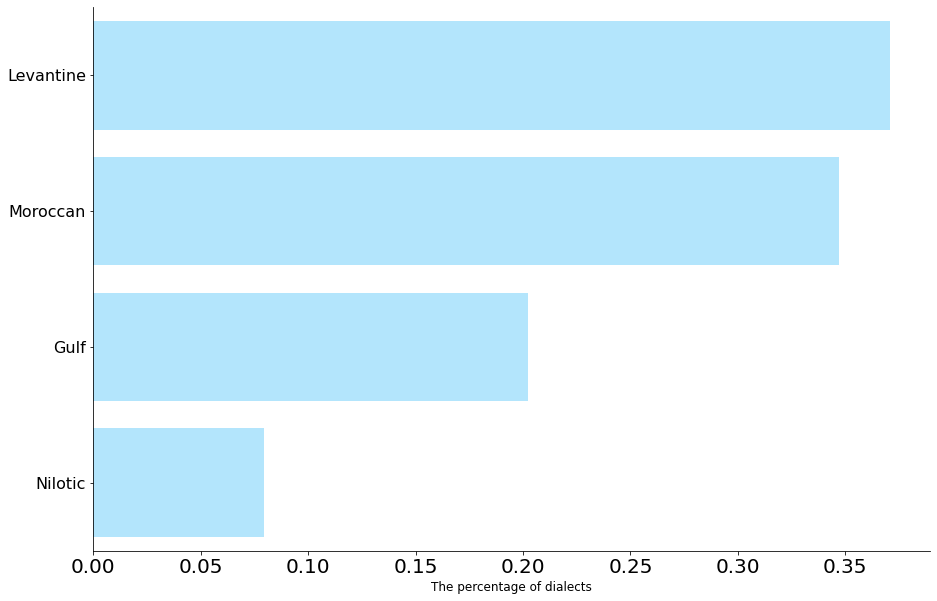

In [59]:
plt.figure(figsize=(15,10))
plt.yticks(fontsize=20, size=16) 
plt.xticks(fontsize=20) 
plt.rc('ytick', labelsize=12) 
sns.barplot(y=data_lable['Dialect'].value_counts().index, 
            x=data_lable['Dialect'].value_counts(normalize=True, ascending=False), 
            data=data_lable, orient='h', 
            color='#b3e5fc',saturation=1
           )
plt.xlabel('The percentage of dialects', fontsize=12)
# plt.ylabel(fontsize=12, **t_font)

sns.despine();

#### Topics Word Clouds


###### Nilotic

50 most common words in Nilotic


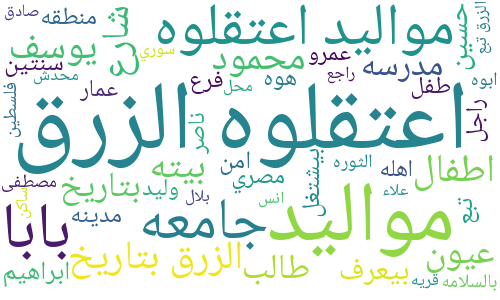

In [60]:
# Create a WordCloud 
Nilotic_df = data_lable[(data_lable['Dialect']=='Nilotic')]

long_string = ','.join(list(Nilotic_df.tweet.values))

reshaped_text = arabic_reshaper.reshape(long_string)
bidi_text = get_display(reshaped_text)
wordcloud = WordCloud(stopwords=stop_ls,max_words=50,width=500, height=300, background_color="white",font_path='Data/ArbFONTS-NotoNaskhArabic-Regular.ttf').generate(bidi_text)

wordcloud.to_file("imag/worCloud_Nilotic.png")
wordcloud.to_image()

###### Gulf

50 most common words in Gulf


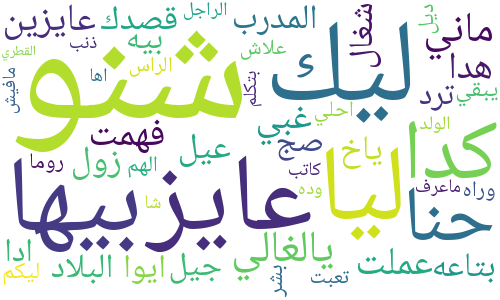

In [61]:
# Create a WordCloud 
Gulf_df = data_lable[(data_lable['Dialect']=='Gulf')]

long_string = ','.join(list(Gulf_df.tweet.values))

reshaped_text = arabic_reshaper.reshape(long_string)
bidi_text = get_display(reshaped_text)
wordcloud = WordCloud(stopwords=stop_ls,max_words=50,width=500, height=300, background_color="white",font_path='Data/ArbFONTS-NotoNaskhArabic-Regular.ttf').generate(bidi_text)

wordcloud.to_file("imag/worCloud_Gulf.png")
wordcloud.to_image()

###### Levantine

50 most common words in Levantine

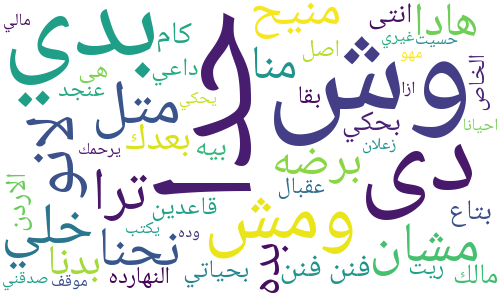

In [62]:
# Create a WordCloud 
Levantine_df = data_lable[(data_lable['Dialect']=='Levantine')]

long_string = ','.join(list(Levantine_df.tweet.values))

reshaped_text = arabic_reshaper.reshape(long_string)
bidi_text = get_display(reshaped_text)
wordcloud = WordCloud(stopwords=stop_ls,max_words=50,width=500, height=300, background_color="white",font_path='Data/ArbFONTS-NotoNaskhArabic-Regular.ttf').generate(bidi_text)

wordcloud.to_file("imag/worCloud_Levantine.png")
wordcloud.to_image()

###### Moroccan

50 most common words in Moroccan

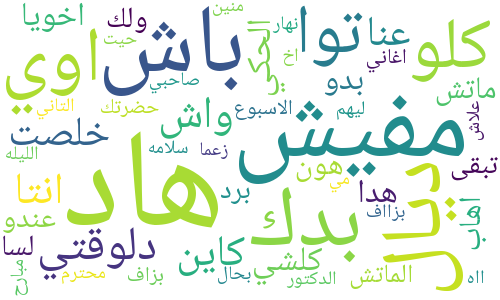

In [63]:
#Create a WordCloud 
Moroccan_df = data_lable[(data_lable['Dialect']=='Moroccan')]

long_string = ','.join(list(Moroccan_df.tweet.values))

reshaped_text = arabic_reshaper.reshape(long_string)
bidi_text = get_display(reshaped_text)
wordcloud = WordCloud(stopwords=stop_ls,max_words=50,width=500, height=300, background_color="white",font_path='Data/ArbFONTS-NotoNaskhArabic-Regular.ttf').generate(bidi_text)

wordcloud.to_file("imag/worCloud_Moroccan.png")
wordcloud.to_image()

## 7. Prepare data for modeling


In [64]:
# Split the data into X and y data sets
X = Dialect.tweet
y = Dialect.Dialect

In [65]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
# The first document-term matrix has default Count Vectorizer values - counts of unigrams

cv1 = TfidfVectorizer(stop_words= stop_ls,ngram_range = (1,2))

X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names()).head()

,ؤاحضنك,ؤاحضنك وانسى,ؤالحمدلله,ؤالحمدلله اصابه,ؤالحياه,ؤالحياه قسمه,ؤاللؤلؤه,ؤاللؤلؤه والمجمعات,ؤاللي,ؤاللي بدؤن,...,ييل يي,ييلا,ييلا بتكشي,ييلس,ييلس بدال,يين,يين لمنير,ييه,ييه زوزو,ييه قلتلك
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 8. Classification

##### Try classifying using Logistic Regression

In [67]:
# Create a logistic regression model to use
lr = LogisticRegression()

In [68]:
# Train the first model
lr.fit(X_train_cv1, y_train)
y_pred_cv1 = lr.predict(X_test_cv1)

In [69]:
print(classification_report(y_test,y_pred_cv1))

              precision    recall  f1-score   support

        Gulf       0.85      0.54      0.66      3687
   Levantine       0.69      0.88      0.77      6747
    Moroccan       0.73      0.79      0.76      6336
     Nilotic       0.99      0.27      0.42      1513

    accuracy                           0.73     18283
   macro avg       0.81      0.62      0.65     18283
weighted avg       0.76      0.73      0.71     18283



In [70]:
print("Logistic Regression Accuracy=",accuracy_score(y_test, y_pred_cv1))
print("Logistic Regression F1 score=",f1_score(y_test, y_pred_cv1, average='micro'))

Logistic Regression Accuracy= 0.7295301646338128
Logistic Regression F1 score= 0.7295301646338129


##### Try classifying using Naive Bayes


In [71]:
# Fit the first Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train_cv1, y_train)

y_pred_cv1_nb = mnb.predict(X_test_cv1)

In [72]:
print(classification_report(y_test,y_pred_cv1_nb))

              precision    recall  f1-score   support

        Gulf       0.97      0.22      0.35      3687
   Levantine       0.59      0.91      0.71      6747
    Moroccan       0.68      0.74      0.71      6336
     Nilotic       1.00      0.07      0.14      1513

    accuracy                           0.64     18283
   macro avg       0.81      0.48      0.48     18283
weighted avg       0.73      0.64      0.59     18283



In [73]:
print("Naive Bayes Accuracy=",accuracy_score(y_test,y_pred_cv1_nb))
print("Naive Bayes F1 score=",f1_score(y_test, y_pred_cv1_nb, average='micro'))

Naive Bayes Accuracy= 0.6420171744243286
Naive Bayes F1 score= 0.6420171744243286


##### Try classifying using SVM


In [74]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = SVC(kernel='linear')
SVM.fit(X_train_cv1,y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(X_test_cv1)

In [75]:
print(classification_report(y_test,predictions_SVM))

              precision    recall  f1-score   support

        Gulf       0.77      0.66      0.71      3687
   Levantine       0.72      0.82      0.77      6747
    Moroccan       0.75      0.77      0.76      6336
     Nilotic       0.87      0.51      0.65      1513

    accuracy                           0.75     18283
   macro avg       0.78      0.69      0.72     18283
weighted avg       0.75      0.75      0.74     18283



In [76]:
# Use accuracy_score function to get the accuracy
print("SVM Accuracy=",accuracy_score(predictions_SVM, y_test))
print("SVM F1 score=",f1_score(y_test,predictions_SVM, average='micro'))

SVM Accuracy= 0.7469780670568288
SVM F1 score= 0.7469780670568288


#### Save the model

In [79]:
import pickle
pickle.dump(SVM, open('model.pkl', 'wb'))


In [80]:
pickle.dump(cv1, open("vectorizer.pickle", "wb"))
